<a href="https://colab.research.google.com/github/greeningstone/m_ini/blob/master/seaborn(3)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualizing the distribution of a dataset
데이터 세트분포 시각화

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set(color_codes=True)

### Plotting univariate distributions
일 변량 분포 플로팅 하기

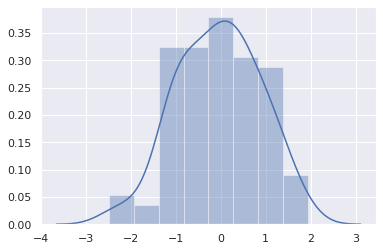

In [3]:
x= np.random.normal(size=100)
sns.distplot(x);

### Histograms
히스토그램


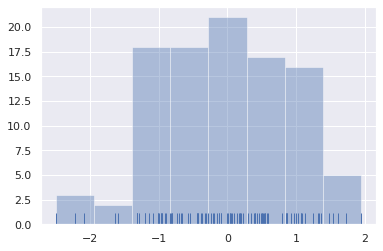

In [4]:
sns.distplot(x,kde= False, rug= True);

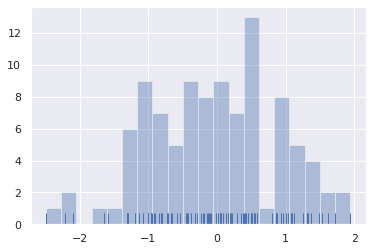

In [5]:
sns.distplot(x, bins=20, kde=False, rug=True);

### Kernel density estimation
커널 밀도 측정

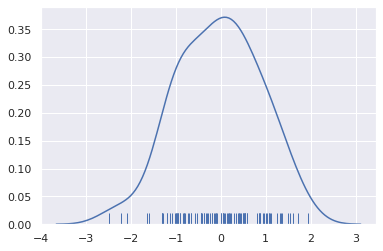

In [8]:
sns.distplot(x, hist=False, rug=True);

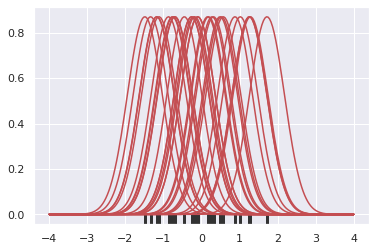

In [11]:
x= np.random.normal(0,1,size=30)
bandwidth =1.06 * x.std() * x.size ** (-1/5.)
support =np.linspace(-4,4,200)

kernels =[]
for x_i in x :
  
  kernel = stats.norm(x_i,bandwidth).pdf(support)
  kernels.append(kernel)
  plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

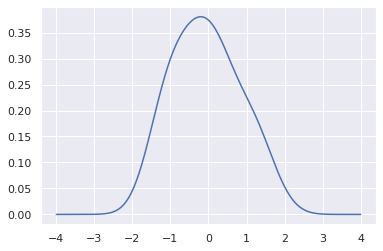

In [13]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)
density /= trapz(density, support)
plt.plot(support, density);

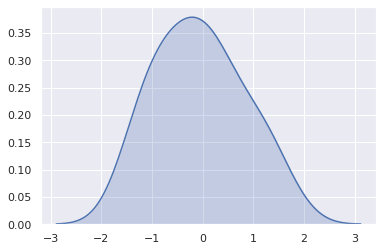

In [14]:
sns.kdeplot(x, shade=True);

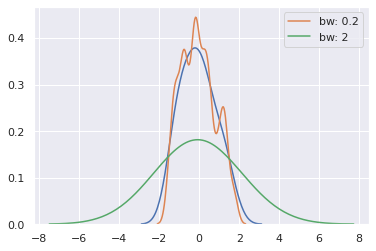

In [19]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label= "bw: 0.2")
sns.kdeplot(x, bw=2, label= "bw: 2")
plt.legend();

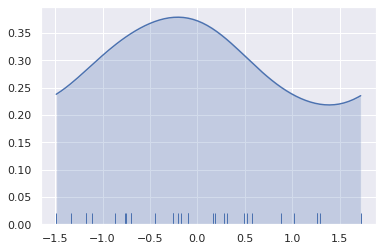

In [20]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

### Fitting parametric distributions
모수 분포 피팅하기


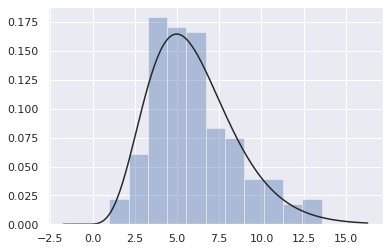

In [21]:
x= np.random.gamma(6,size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

### Plotting bivariate distributions
이변량 분포 플로팅하기


In [23]:
mean, cov = [0,1],[(1,.5), (.5,1)]
data = np.random.multivariate_normal(mean,cov, 200)
df = pd.DataFrame(data, columns = ["x","y"])

### Scatterplots
산점도

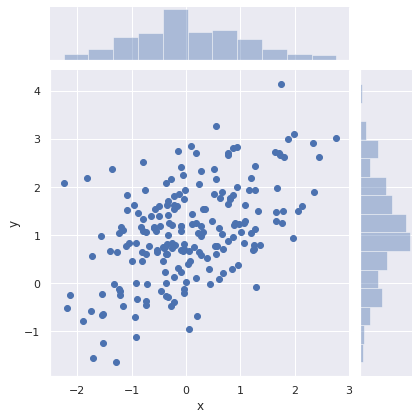

In [25]:
sns.jointplot(x="x",y="y",data=df);

### Hexbin plots¶
헥스 빈 플롯

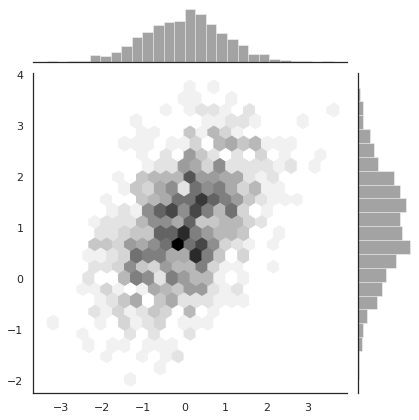

In [27]:
x, y =np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
  sns.jointplot(x=x, y=y, kind="hex", color='k')

### Kernel density estimation¶
커널 밀도 측정

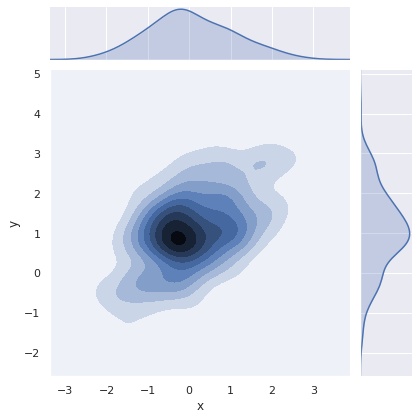

In [28]:
sns.jointplot(x="x",y="y", data=df, kind="kde");

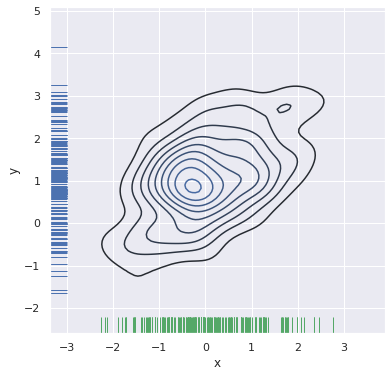

In [30]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

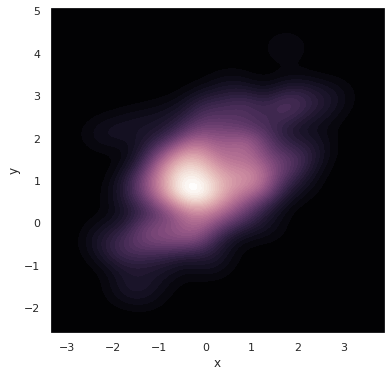

In [32]:
f, ax = plt.subplots(figsize=(6,6))
cmap= sns.cubehelix_palette(as_cmap= True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

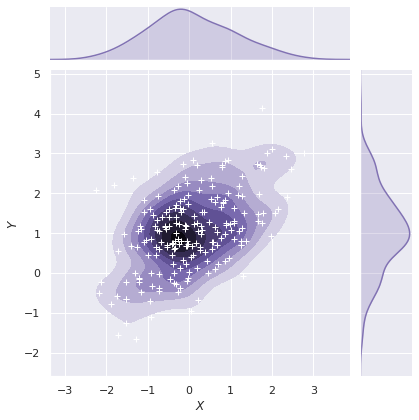

In [34]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### Visualizing pairwise relationships in a dataset¶
데이터 세트에서 쌍 관계 시각화


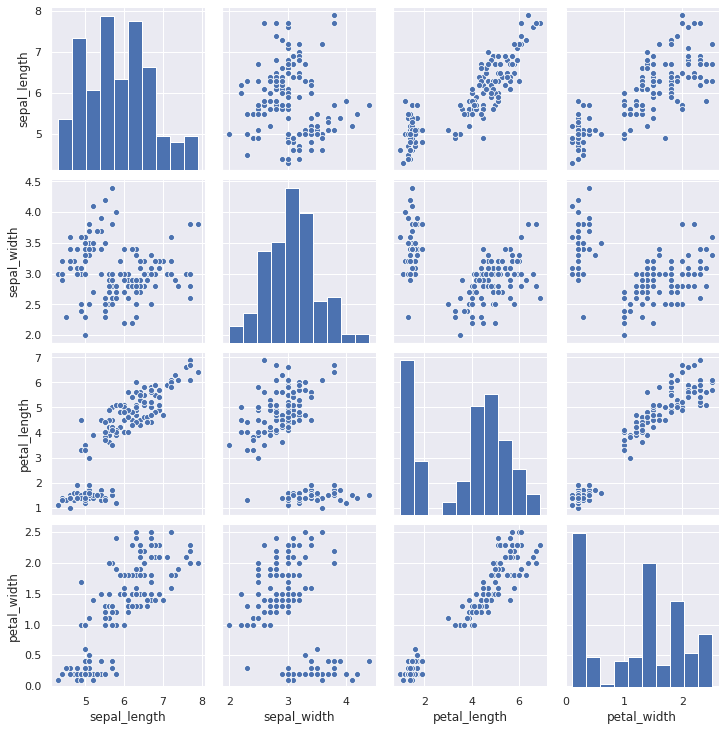

In [35]:
iris= sns.load_dataset("iris")
sns.pairplot(iris);

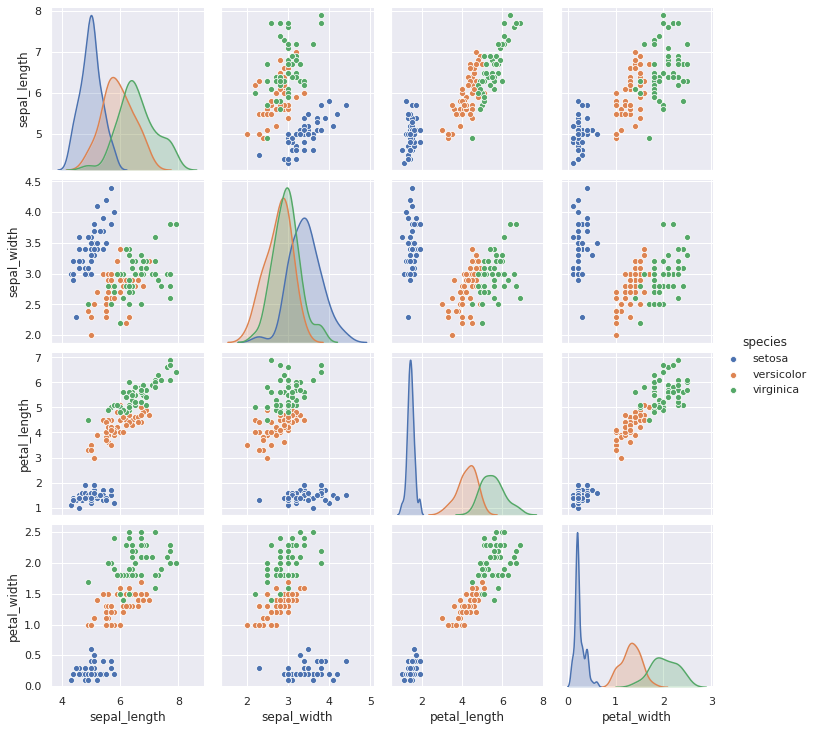

In [37]:
sns.pairplot(iris,hue="species");

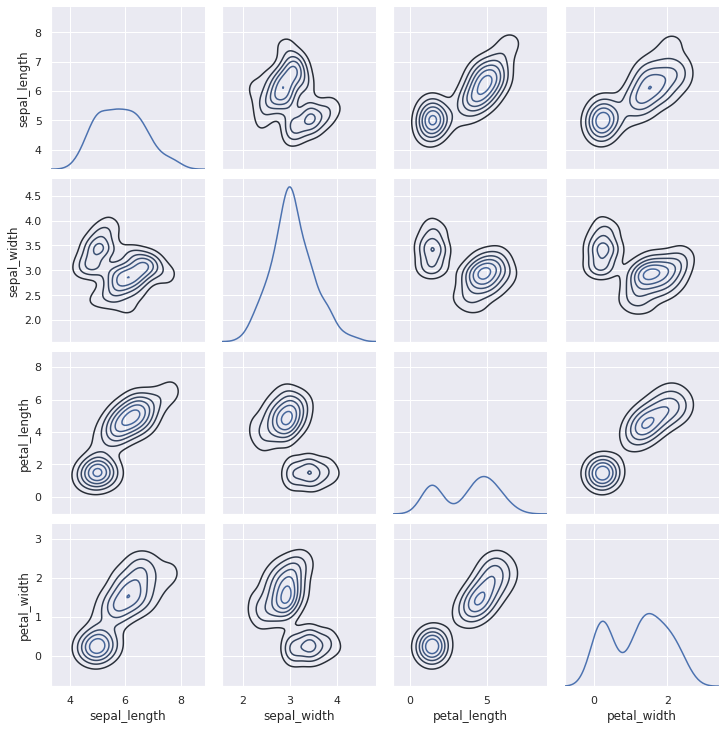

In [38]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);